In [3]:
# import jupyter notebook magic to show plots and automatically load modules
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# import python packages for solving the problem
import pandas as pd
import math
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# file names of the data
cta_entry_fname = '../data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv'
cta_station_fname = '../data/CTA_-_System_Information_-_List_of__L__Stops.csv'

In [6]:
def str_to_date(x, str_format='%m/%d/%Y'):
    """
    
    """
    return datetime.strptime(x, str_format)

In [7]:
# read data into data frames
df_cta_entry = pd.read_csv(cta_entry_fname)
# convert the date in string to datetime
df_cta_entry['date'] = df_cta_entry.date.apply(lambda x: str_to_date(x))
df_cta_station = pd.read_csv(cta_station_fname)

# Warm Up Questions

- Which stop has the highest average ridership per day, and what is it?

- What’s the standard deviation for the Washington/Wabash stop? What’s your hypothesis for why?

## HIghest average ridership

Station with the highest average ridership per day is Clark/Lake, with mean of 13972.55(~13973)  people per day

In [8]:
# group each ride by each station, and calculate the mean
df_rides = pd.DataFrame(df_cta_entry.groupby(['stationname']).rides.mean())
# sort the station in order of highest mean to lowest mean per day
df_rides = df_rides.sort_values('rides', ascending=False)
# station withe the highest mean is the first station
highest_mean = df_rides.iloc[0]

In [17]:
print('Train station with the highest aveage ridership per day is : {}'.format(highest_mean.name))

Train station with the highest aveage ridership per day is : Clark/Lake


### Plot for the average ridership for each station in descending order

Text(0, 0.5, 'Number of rides')

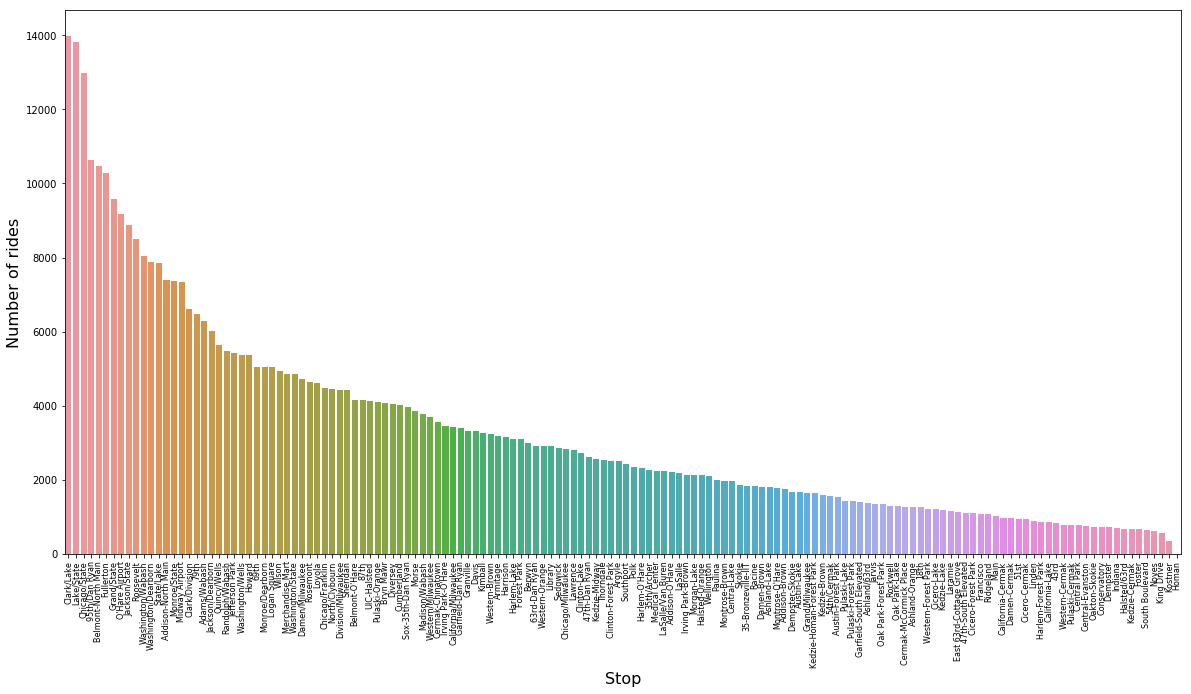

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
df_rides = df_rides.reset_index()
sns.barplot(x='stationname', y='rides', data=df_rides, ax=ax)
for item in ax.get_xticklabels():
    item.set_rotation(90)
#figure style
fontsize=16
ax.set_xlabel('Stop', fontsize=fontsize)
ax.set_xticklabels(df_rides.stationname, fontsize=0.5*fontsize)
ax.set_ylabel('Number of rides', fontsize=fontsize)

##  What’s the standard deviation for the Washington/Wabash stop? What’s your hypothesis for why?

In the data set, Washington/Wabash which is the staion hosting 5 lines (Green, Brown, Purple Express, Pink and Orange) has less than 100 customers per day until 8/30/2017, then surges up to thousands on 8/31/2017. From this observation, we can infer that Washington/Wabash was either under construction or closed. 

By cross checking with CTA (https://www.transitchicago.com/washingtonwabash/) Washington/Wabash opened on August 31, 2017. From this information, we can conclude that ~100 customers per day until 8/30/2017 is probably operators or test users.

In [20]:
map_id = df_cta_station[df_cta_station.STATION_NAME=='Washington/Wabash'].MAP_ID.unique()[0]

In [21]:
df_ww = df_cta_entry[(df_cta_entry.station_id == map_id) & 
             (df_cta_entry.date >= pd.Timestamp('2017-08-31'))]

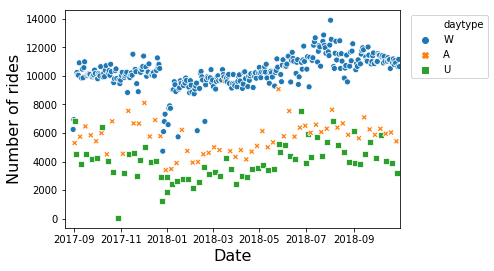

In [24]:
ax = sns.scatterplot(x='date', y='rides',hue='daytype', style='daytype', data=df_ww)
axes = ax.axes
axes.set_xlim([pd.Timestamp('2017-8-20'), df_ww.date.iloc[-1]])
#figure style
fontsize=16
axes.set_xlabel('Date', fontsize=fontsize)
axes.set_ylabel('Number of rides', fontsize=fontsize)
axes.legend(bbox_to_anchor=(1.02, 1))

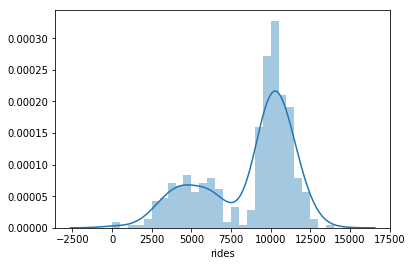

In [29]:
ax = sns.distplot(df_ww.rides, bins=np.arange(0, 15000, 500))

,station_id,stationname,date,daytype,rides
861962,41700,Washington/Wabash,2017-08-01,W,0
862060,41700,Washington/Wabash,2017-08-02,W,0
862201,41700,Washington/Wabash,2017-08-03,W,0
862355,41700,Washington/Wabash,2017-08-04,W,0
862517,41700,Washington/Wabash,2017-08-05,A,0
862631,41700,Washington/Wabash,2017-08-06,U,0
862894,41700,Washington/Wabash,2017-08-07,W,0
863038,41700,Washington/Wabash,2017-08-08,W,0
863158,41700,Washington/Wabash,2017-08-09,W,0
863217,41700,Washington/Wabash,2017-08-10,W,0


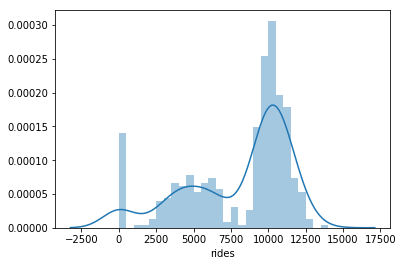

In [34]:
df_test = df_cta_entry[(df_cta_entry.station_id == map_id)]
sns.distplot(df_test.rides, bins=np.arange(0, 15000, 500))
df_test[df_test.rides < 500]